<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/NLP__RNN_%EA%B8%B0%EB%B0%98_%EB%AA%A8%EB%8D%B8%EC%9D%84_%ED%86%B5%ED%95%9C_%EB%B6%84%EB%A5%98_%EC%9E%91%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

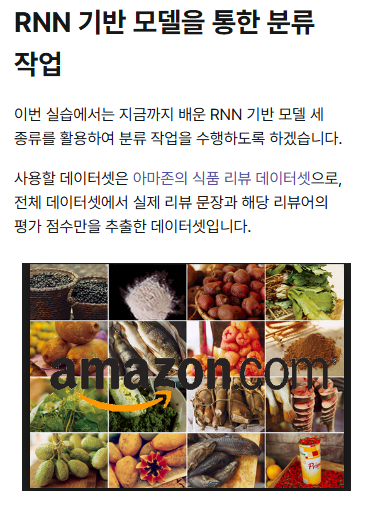

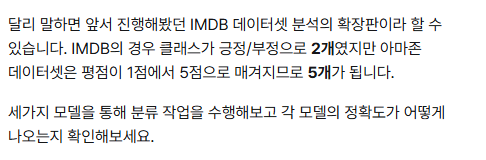

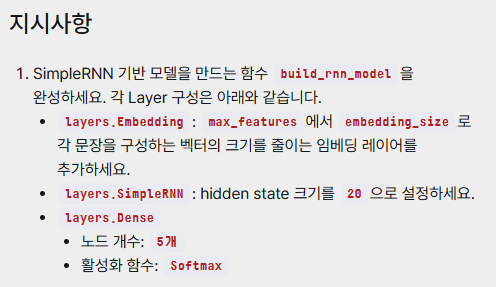

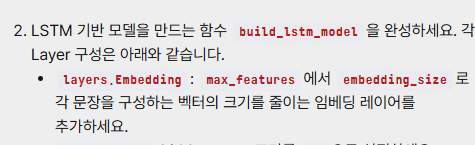

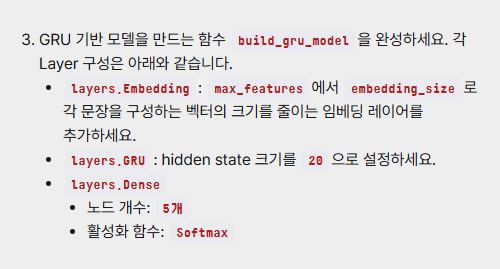

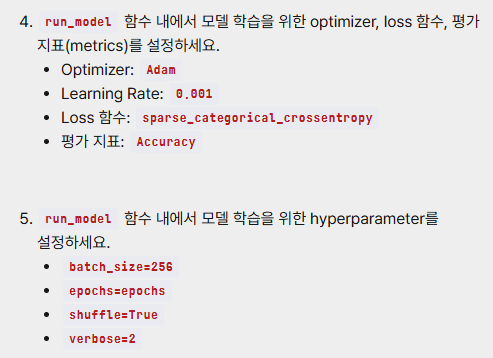

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import pandas as pd

def load_data(max_len):
    data = pd.read_csv("./review_score.csv")
    # 리뷰 문장을 입력 데이터로, 해당 리뷰의 평점을 라벨 데이터로 설정합니다.
    X = data['Review']
    y = data['Score']
    y = y - 1 # 값을 1~5에서 0~4로 변경

    # 문장 내 각 단어를 숫자로 변환하는 Tokenizer를 적용합니다.
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X = tokenizer.texts_to_sequences(X)

    # 전체 단어 중에서 가장 큰 숫자로 mapping된 단어의 숫자를 가져옵니다.
    # 즉, max_features는 전체 데이터셋에 등장하는 겹치지 않는 단어의 개수 + 1과 동일합니다.
    max_features = max([max(_in) for _in in X]) + 1

    # 불러온 데이터셋을 학습 데이터 80%, 테스트 데이터 20%로 분리합니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # 모든 문장들을 가장 긴 문장의 단어 개수가 되게 padding을 추가합니다.
    X_train = pad_sequences(X_train, maxlen=max_len)
    X_test = pad_sequences(X_test, maxlen=max_len)

    return X_train, X_test, y_train, y_test, max_features

def build_rnn_model(max_features, embedding_size):
    model = Sequential()

    # TODO: [지시사항 1번] Simple RNN 기반의 모델을 완성하세요.
    model.add(layers.Embedding(max_features, embedding_size)) # 자연어니까 Embedding layers 추가함
    model.add(layers.SimpleRNN(20))
    model.add(layers.Dense(5, activation="softmax"))

    return model

def build_lstm_model(max_features, embedding_size):
    model = Sequential()

    # TODO: [지시사항 2번] LSTM 기반의 모델을 완성하세요.
    model.add(layers.Embedding(max_features, embedding_size))
    model.add(layers.LSTM(20))
    model.add(layers.Dense(5, activation="softmax"))

    return model

def build_gru_model(max_features, embedding_size):
    model = Sequential()

    # TODO: [지시사항 3번] GRU 기반의 모델을 완성하세요.
    model.add(layers.Embedding(max_features, embedding_size))
    model.add(layers.GRU(20))
    model.add(layers.Dense(5, activation="softmax"))

    return model

def run_model(model, X_train, X_test, y_train, y_test, epochs=10):
    # TODO: [지시사항 4번] 모델 학습을 위한 optimizer, loss 함수, 평가 지표를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=256, shuffle=True, verbose=2)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return test_loss, test_acc, optimizer, hist

def main():
    tf.random.set_seed(2022)
    max_len = 150
    embedding_size = 128

    X_train, X_test, y_train, y_test, max_features = load_data(max_len)
    rnn_model = build_rnn_model(max_features, embedding_size)
    lstm_model = build_lstm_model(max_features, embedding_size)
    gru_model = build_gru_model(max_features, embedding_size)

    rnn_test_loss, rnn_test_acc, _, _ = run_model(rnn_model, X_train, X_test, y_train, y_test)
    lstm_test_loss, lstm_test_acc, _, _ = run_model(lstm_model, X_train, X_test, y_train, y_test)
    gru_test_loss, gru_test_acc, _, _ = run_model(gru_model, X_train, X_test, y_train, y_test)

    print()
    print("=" * 20, "모델 별 Test Loss와 정확도", "=" * 20)
    print("[RNN ] 테스트 Loss: {:.5f}, 테스트 Accuracy: {:.3f}%".format(rnn_test_loss, rnn_test_acc * 100))
    print("[LSTM] 테스트 Loss: {:.5f}, 테스트 Accuracy: {:.3f}%".format(lstm_test_loss, lstm_test_acc * 100))
    print("[GRU ] 테스트 Loss: {:.5f}, 테스트 Accuracy: {:.3f}%".format(gru_test_loss, gru_test_acc * 100))

if __name__ == "__main__":
    main()

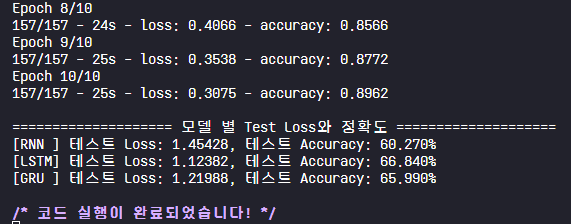